In [1]:
import wget
import os
import tensorflow as tf
import keras_preprocessing
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import load_model

In [10]:
paths = {
    'IMAGES_PATH': os.path.join('workspace', 'images'),
    'NG_DIR': os.path.join('workspace','images','train-dai','ng'),
    'OK_DIR': os.path.join('workspace','images','train-dai','ok'),
    # 'SCISSORS_DIR': os.path.join('workspace','images','rps','scissors'),
    'TRAINING_DIR': os.path.join('workspace','images','train-dai'),
    'VAL_DIR': os.path.join('workspace','images','test-dai')
 }

for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [7]:
wget.download('https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip')
wget.download('https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip')

'rps-test-set.zip'

In [8]:
!move rps.zip {paths['IMAGES_PATH']}
!move rps-test-set.zip {paths['IMAGES_PATH']}
!cd {paths['IMAGES_PATH']} && tar -xf rps.zip && tar -xf rps-test-set.zip

        1 file(s) moved.
        1 file(s) moved.


In [11]:
print('total training rock images:', len(os.listdir(paths['OK_DIR'])))
print('total training paper images:', len(os.listdir(paths['NG_DIR'])))
print('total training scissors images:', len(os.listdir(paths['SCISSORS_DIR'])))

total training rock images: 4
total training paper images: 6


KeyError: 'SCISSORS_DIR'

In [12]:
TRAINING_DIR = paths['TRAINING_DIR']
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='binary')
#     batch_size=126)

VALIDATION_DIR = paths['VAL_DIR']
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='binary')
#     batch_size=126)

Found 10 images belonging to 2 classes.
Found 5 images belonging to 2 classes.


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [16]:
model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(
    train_generator,
    epochs=500,
    validation_data = validation_generator,
    verbose = 1)
model.save("daihatsu_v1.h5")

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.6413 - accuracy: 0.7000 - val_loss: 0.8108 - val_accuracy: 0.8000
Epoch 2/500
1/1 [==============================] - 0s 373ms/step - loss: 0.5786 - accuracy: 0.7000 - val_loss: 0.9505 - val_accuracy: 0.8000
Epoch 3/500
1/1 [==============================] - 0s 372ms/step - loss: 0.7188 - accuracy: 0.5000 - val_loss: 0.6713 - val_accuracy: 0.8000
Epoch 4/500
1/1 [==============================] - 0s 315ms/step - loss: 0.7280 - accuracy: 0.7000 - val_loss: 0.5676 - val_accuracy: 0.8000
Epoch 5/500
1/1 [==============================] - 0s 323ms/step - loss: 0.6448 - accuracy: 0.7000 - val_loss: 0.5569 - val_accuracy: 0.8000
Epoch 6/500
1/1 [==============================] - 0s 259ms/step - loss: 0.4968 - accuracy: 0.8000 - val_loss: 0.6777 - val_accuracy: 0.8000
Epoch 7/500
1/1 [==============================] - 0s 256ms/step - loss: 1.0502 - accuracy: 0.4000 - val_loss: 0.5648 - val_accuracy: 0.8000
Epoch 8/500
1/1 

KeyboardInterrupt: 

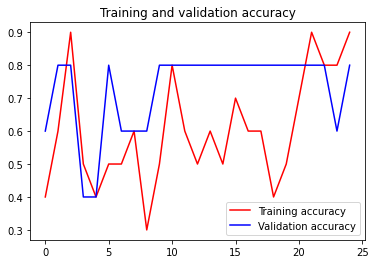

<Figure size 432x288 with 0 Axes>

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

[[0.]]


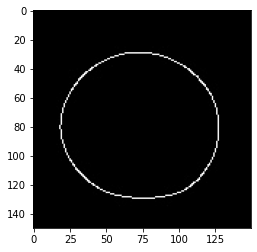

In [23]:
model = load_model('./daihatsu_v1.h5')

# img = cv.imread('./3.jpg')
# img = cv.resize(img, (150,150))
# img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

path = os.path.join(paths['VAL_DIR'], 'ok', 'ok-bde551a8-363a-11ec-8228-e82a44fd41b0.jpeg')
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images)

plt.imshow(img)
print(classes) # [[ng, ok]]